In [1]:
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
%matplotlib inline

In [3]:
class OptimalPageReplacement:
    def __init__(self, pages, frames):
        self.pages = pages                  # Sequence of page references
        self.frames = frames                # Number of physical memory frames
        self.memory = []                    # Current state of memory
        self.page_faults = 0                # Counter for page faults
        self.page_hits = 0                  # Counter for page hits
        self.replacement_log = []           # Log of replacements
        self.history = []                   # Memory state history for visualization
        self.lastUsed = []                  # Index of last used

    def simulate(self):
        for time, page in enumerate(self.pages):
            if page in self.memory:
                # Page hit: The page is already in memory
                self.page_hits += 1
                # delete the 1st instance of page in lastUsed
                if page in self.lastUsed:
                    del self.lastUsed[self.lastUsed.index(page)]
                self.lastUsed.insert(0, page)
                self.replacement_log.append((time, page, "Hit", list(self.memory)))
            else:
                # Page fault: The page is not in memory
                self.page_faults += 1
                if len(self.memory) < self.frames:
                    # Add the page if there's space in memory
                    self.memory.append(page)
                    self.lastUsed.insert(0, page)
                else:
                    # Replace the oldest page (Optimal)
                    while True:
                        try:
                            lastUsedPage = self.lastUsed.pop()
                        except:
                            break
                        if lastUsedPage in self.memory:
                            lastUsedIndex = self.memory.index(lastUsedPage)
                            break
                        
                    self.memory[lastUsedIndex] = page
                self.replacement_log.append((time, page, "Fault", list(self.memory)))
            # Log memory state after each step
            self.history.append(list(self.memory))

    def get_summary(self):
        total_accesses = len(self.pages)
        hit_percentage = (self.page_hits / total_accesses) * 100
        fault_percentage = (self.page_faults / total_accesses) * 100

        return {
            "Total Page Accesses": total_accesses,
            "Page Hits": self.page_hits,
            "Page Faults": self.page_faults,
            "Hit Percentage": f"{hit_percentage:.2f}%",
            "Fault Percentage": f"{fault_percentage:.2f}%",
        }

    def print_log(self):
        print("\nPage Replacement Log:")
        print(tabulate(self.replacement_log, headers=["Time", "Page", "Action", "Memory State"], tablefmt="pretty"))

    def print_summary(self):
        summary = self.get_summary()
        print("\nSummary Statistics:")
        print(tabulate(summary.items(), headers=["Metric", "Value"], tablefmt="pretty"))

    def plot_memory(self):
        
    # Create a table visualization of memory state
        df = pd.DataFrame(self.history).fillna(-1).astype(int)  # Convert all values to strings
        
        df.columns = [f"Frame {i+1}" for i in range(self.frames)]
    
        df_display = df.replace(-1, "-")
        
        print("\nMemory State Progression:")
        print(tabulate(df_display, headers="keys", tablefmt="pretty", showindex=True))

        df = df.replace(-1, None)
        
        # Plot memory usage for visual representation
        plt.figure(figsize=(10, 6))
        for i in range(self.frames):
            frame_state = df[f"Frame {i+1}"]
            frame_state_numeric = pd.to_numeric(frame_state, errors='coerce')
            plt.plot(frame_state_numeric, marker="o", label=f"Frame {i+1}")
            
        plt.title("Optimal Page Replacement - Memory State Progression")
        plt.xlabel("Time Step")
        plt.ylabel("Page Number / State")
        plt.legend()
        plt.grid()
        plt.ioff()
        plt.gcf().savefig(fname="Plot Figures/PR_Optimal", pad_inches=0.3)
        plt.show()

Optimal Page Replacement Simulator


Enter the page reference sequence (space-separated):  7 0 1 2 0 3 0 4 2 3 0 3 2 3
Enter the number of memory frames:  4



Page Replacement Log:
+------+------+--------+--------------+
| Time | Page | Action | Memory State |
+------+------+--------+--------------+
|  0   |  7   | Fault  |     [7]      |
|  1   |  0   | Fault  |    [7, 0]    |
|  2   |  1   | Fault  |  [7, 0, 1]   |
|  3   |  2   | Fault  | [7, 0, 1, 2] |
|  4   |  0   |  Hit   | [7, 0, 1, 2] |
|  5   |  3   | Fault  | [3, 0, 1, 2] |
|  6   |  0   |  Hit   | [3, 0, 1, 2] |
|  7   |  4   | Fault  | [3, 0, 4, 2] |
|  8   |  2   |  Hit   | [3, 0, 4, 2] |
|  9   |  3   |  Hit   | [3, 0, 4, 2] |
|  10  |  0   |  Hit   | [3, 0, 4, 2] |
|  11  |  3   |  Hit   | [3, 0, 4, 2] |
|  12  |  2   |  Hit   | [3, 0, 4, 2] |
|  13  |  3   |  Hit   | [3, 0, 4, 2] |
+------+------+--------+--------------+

Summary Statistics:
+---------------------+--------+
|       Metric        | Value  |
+---------------------+--------+
| Total Page Accesses |   14   |
|      Page Hits      |   8    |
|     Page Faults     |   6    |
|   Hit Percentage    | 57.14% |
|  Fa

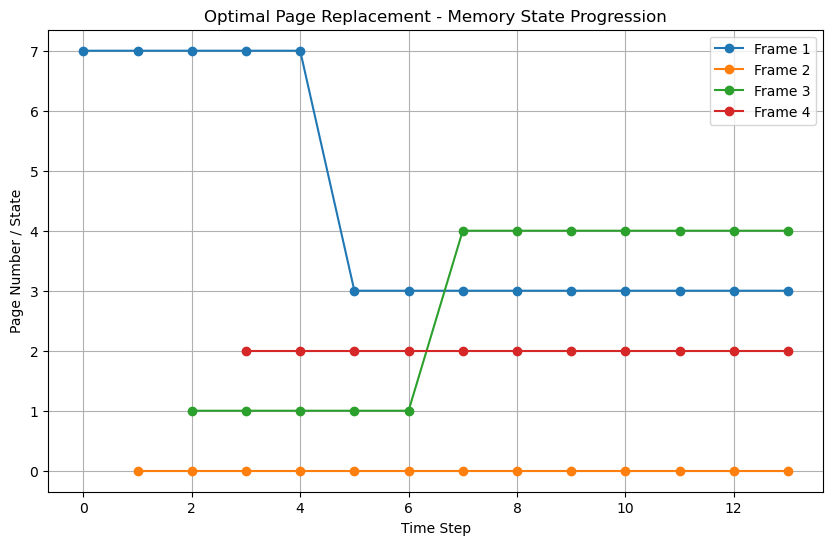

In [4]:
# Main Program Interface
if __name__ == "__main__":
    print("Optimal Page Replacement Simulator")

    # Input: Sequence of page references
    while True:
        try:
            # 7 0 1 2 0 3 0 4 2 3 0 3 2 3
            pages = list(map(int, input("Enter the page reference sequence (space-separated): ").split()))
            break
        except ValueError:
            print("Invalid input. Please enter a sequence of integers.")

    # Input: Number of memory frames
    while True:
        try:
            frames = int(input("Enter the number of memory frames: "))
            if frames <= 0:
                raise ValueError
            break
        except ValueError:
            print("Invalid input. Please enter a positive integer.")

    # Run simulation
    simulator = OptimalPageReplacement(pages, frames)
    simulator.simulate()

    # Display logs and results
    simulator.print_log()
    simulator.print_summary()
    simulator.plot_memory()